In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA



In [4]:
# Ruta al archivo ya preprocesado (sin nulos ni outliers)
df = pd.read_csv('../Data/motor_data_2011_2018_RISK.csv')

# Eliminamos la columna innecesaria Unnamed: 0 si existe
if 'Unnamed: 0' in df.columns:
    df.drop(columns='Unnamed: 0', inplace=True)

# Vista previa de los datos
df.head()

,OBJECT_ID,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID,HAS_CLAIM,RISK_CATEGORY
0,5000029885,0,2013-08-08,2014-08-07,2008.0,1202,519755.22,7209.140,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00,0,Normal
1,5000029885,0,2012-08-08,2013-08-07,2008.0,1202,519755.22,7203.890,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00,0,Normal
2,5000029885,0,2011-08-08,2012-08-07,2008.0,1202,519755.22,7045.804,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00,0,Normal
3,5000029885,0,2011-07-08,2011-08-07,2008.0,1202,519755.22,287.250,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,0.00,0,Normal
4,5000029901,0,2013-08-08,2014-08-07,2008.0,1202,285451.24,4286.900,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43,1,Normal


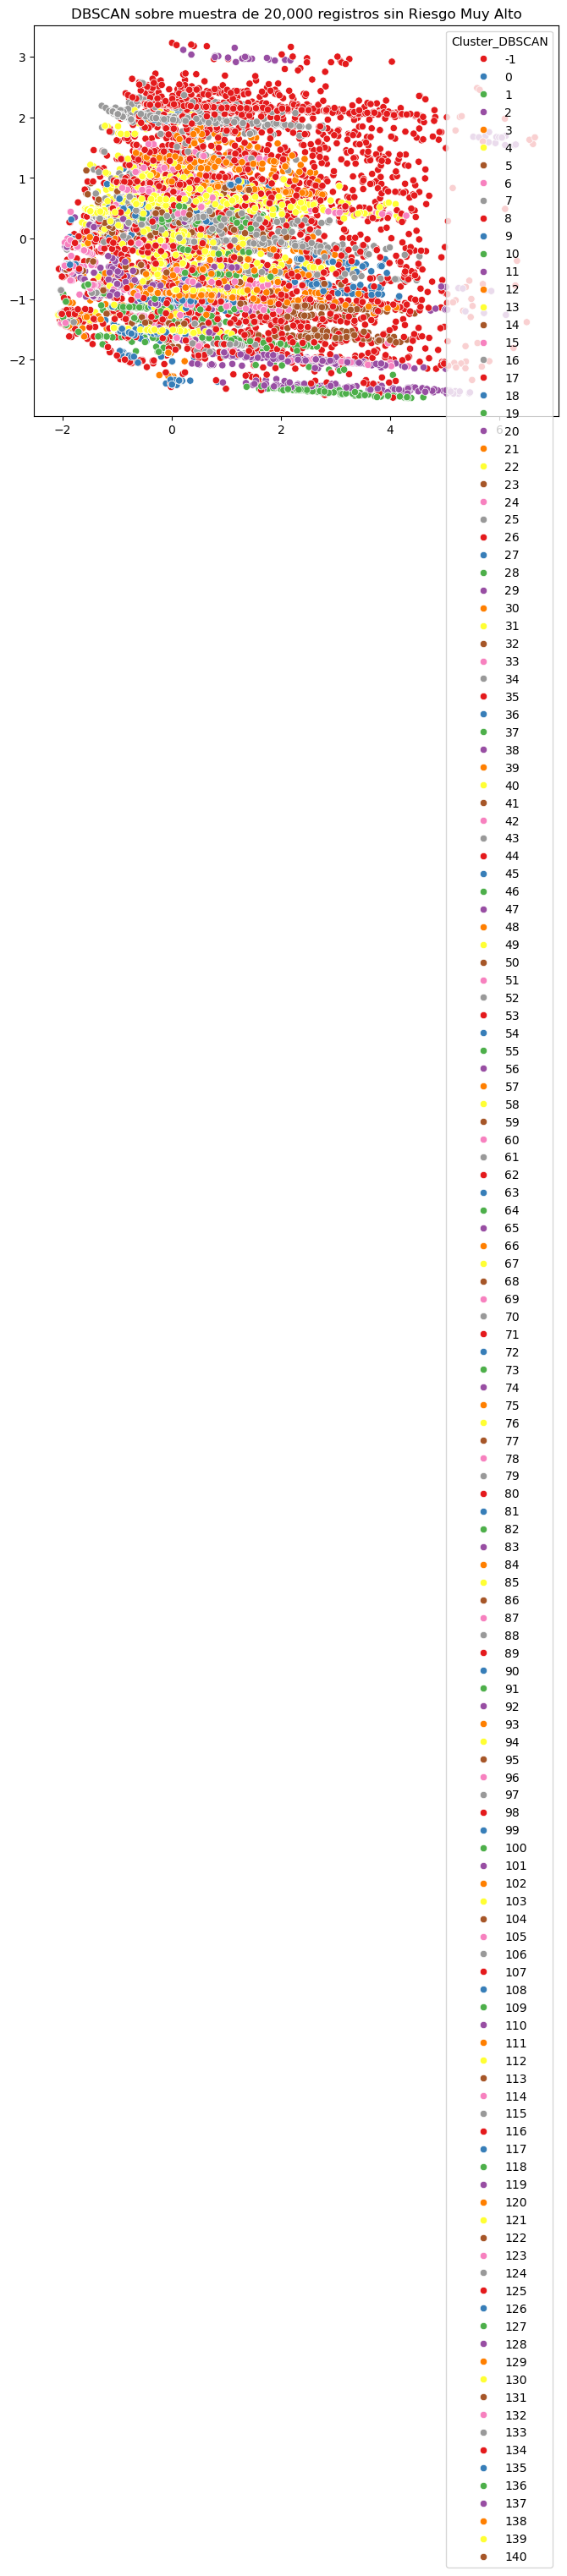

Cluster_DBSCAN
-1      2256
 4      1914
 8      1647
 6      1026
 22     1005
        ... 
 140      10
 107      10
 120      10
 95       10
 132      10
Name: count, Length: 142, dtype: int64


In [8]:
# 1️⃣ Filtrar datos sin casos de "Very High" riesgo
df_cluster = df[df['RISK_CATEGORY'] == 'Normal'].copy()

# 2️⃣ Definir variables para clustering
features = ['SEX', 'INSURED_VALUE', 'PREMIUM', 'SEATS_NUM', 
            'CARRYING_CAPACITY', 'CCM_TON', 'MAKE', 'USAGE', 'CLAIM_PAID']

cat_features = ['MAKE', 'USAGE']
num_features = ['SEX', 'INSURED_VALUE', 'PREMIUM', 'SEATS_NUM', 
                'CARRYING_CAPACITY', 'CCM_TON', 'CLAIM_PAID']

# 3️⃣ Definir pipeline de preprocesamiento
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# 4️⃣ Tomar una muestra para DBSCAN (evita que se cuelgue)
df_cluster_sample = df_cluster.sample(n=20000, random_state=42).copy()

# 5️⃣ Preprocesar la muestra
X_sample = pipeline.fit_transform(df_cluster_sample)

# 6️⃣ Aplicar DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=10)
clusters = dbscan.fit_predict(X_sample)

df_cluster_sample['Cluster_DBSCAN'] = clusters

# 7️⃣ Visualización con PCA
X_pca = PCA(n_components=5).fit_transform(X_sample)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_cluster_sample['Cluster_DBSCAN'], palette='Set1')
plt.title('DBSCAN sobre muestra de 20,000 registros sin Riesgo Muy Alto')
plt.show()

# 8️⃣ Conteo de clústeres
print(df_cluster_sample['Cluster_DBSCAN'].value_counts())